In [1]:
# Impor library
from math import pi

# Circuit by Qiskit-IBM
from qiskit import *
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.circuit.library import RealAmplitudes, EfficientSU2, ZZFeatureMap, PauliFeatureMap, ZFeatureMap
from qiskit.circuit.library.n_local.two_local import TwoLocal
from qiskit.utils import algorithm_globals
from qiskit.algorithms.optimizers import ADAM, COBYLA, L_BFGS_B, SPSA
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR, QSVR
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector, circuit_drawer

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8588\829820211.py:10: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import ADAM, COBYLA, L_BFGS_B, SPSA


<div style="text-align: center; font-size: 20px;">
    <h2><span style="color:blue;">Quantum Neural Network (QNN)</span></h2>
</div>

C:\Users\LENOVO\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


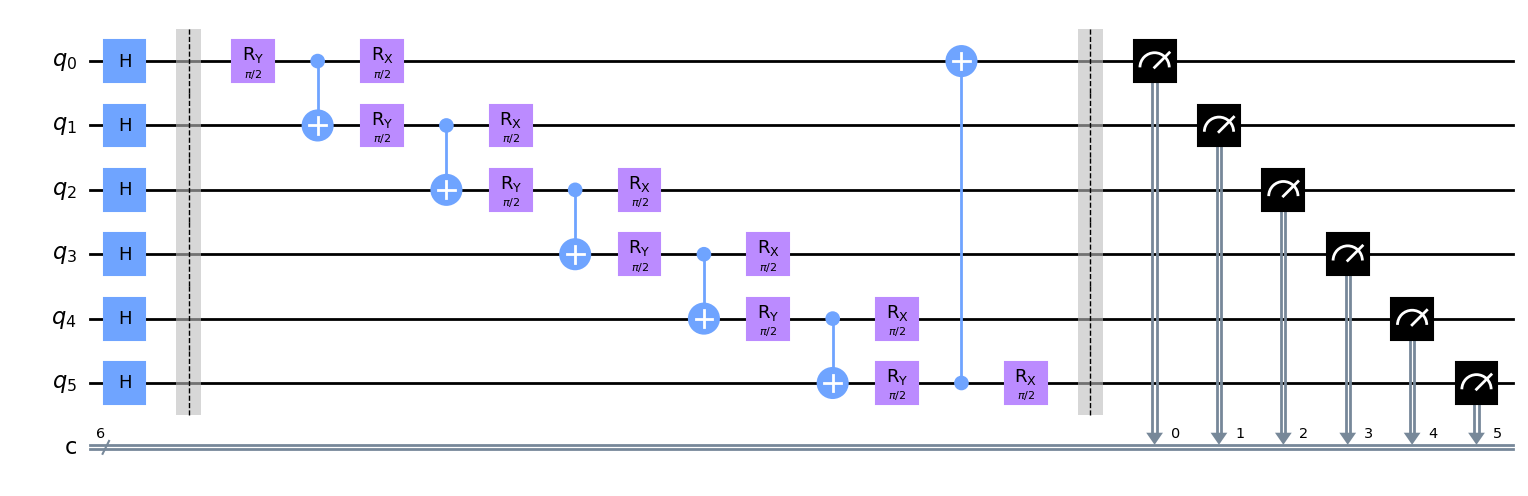

In [2]:
num_qubits = 6
qr         = QuantumRegister(num_qubits, 'q')     
cr         = ClassicalRegister(num_qubits, 'c')    
qc         = QuantumCircuit(qr, cr)               

for i in range(num_qubits):
    qc.h(i)

qc.barrier()

for i in range(num_qubits):
    qc.ry(pi/2, i)
    qc.cx(i, (i+1)%num_qubits)
    qc.rx(pi/2, i)

qc.barrier()

qc.measure(qr, cr)

qc.draw(output='mpl')

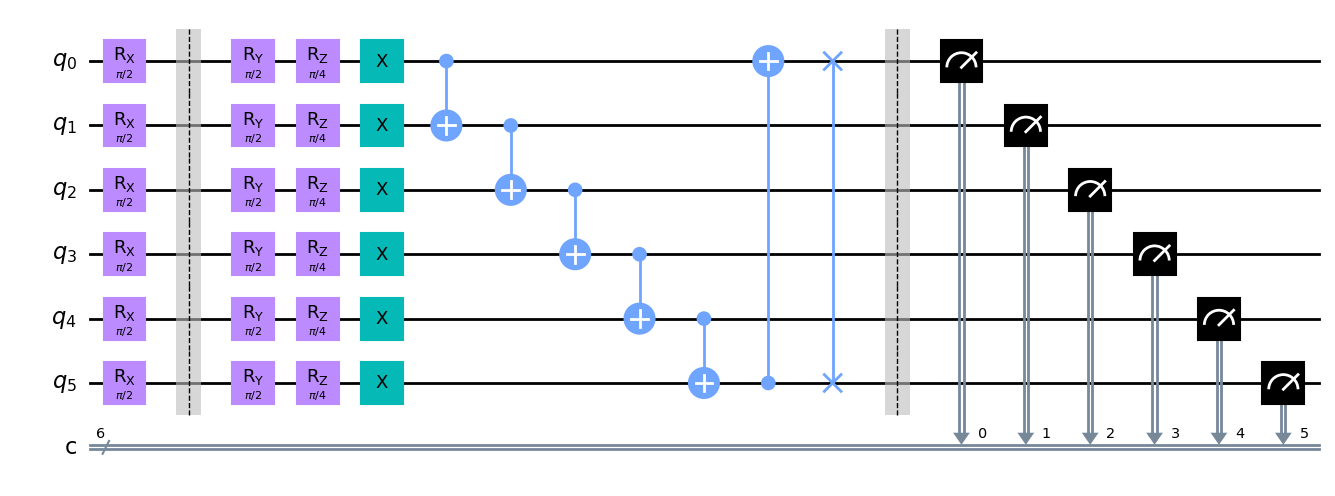

In [3]:
qr = QuantumRegister(num_qubits, 'q')
cr = ClassicalRegister(num_qubits, 'c')
qc = QuantumCircuit(qr, cr)

for i in range(6):
    qc.rx(pi/2, i)

qc.barrier()

for j in range(1):                                       
    for i in range(6):
        qc.ry(pi/2, i)
        qc.rz(pi/4, i)
        qc.x(i)
    for i in range(5):
        qc.cx(i, i + 1)
qc.cx(5, 0)
qc.swap(5, 0)

qc.barrier()

qc.measure(qr, cr)

qc.draw(output='mpl')

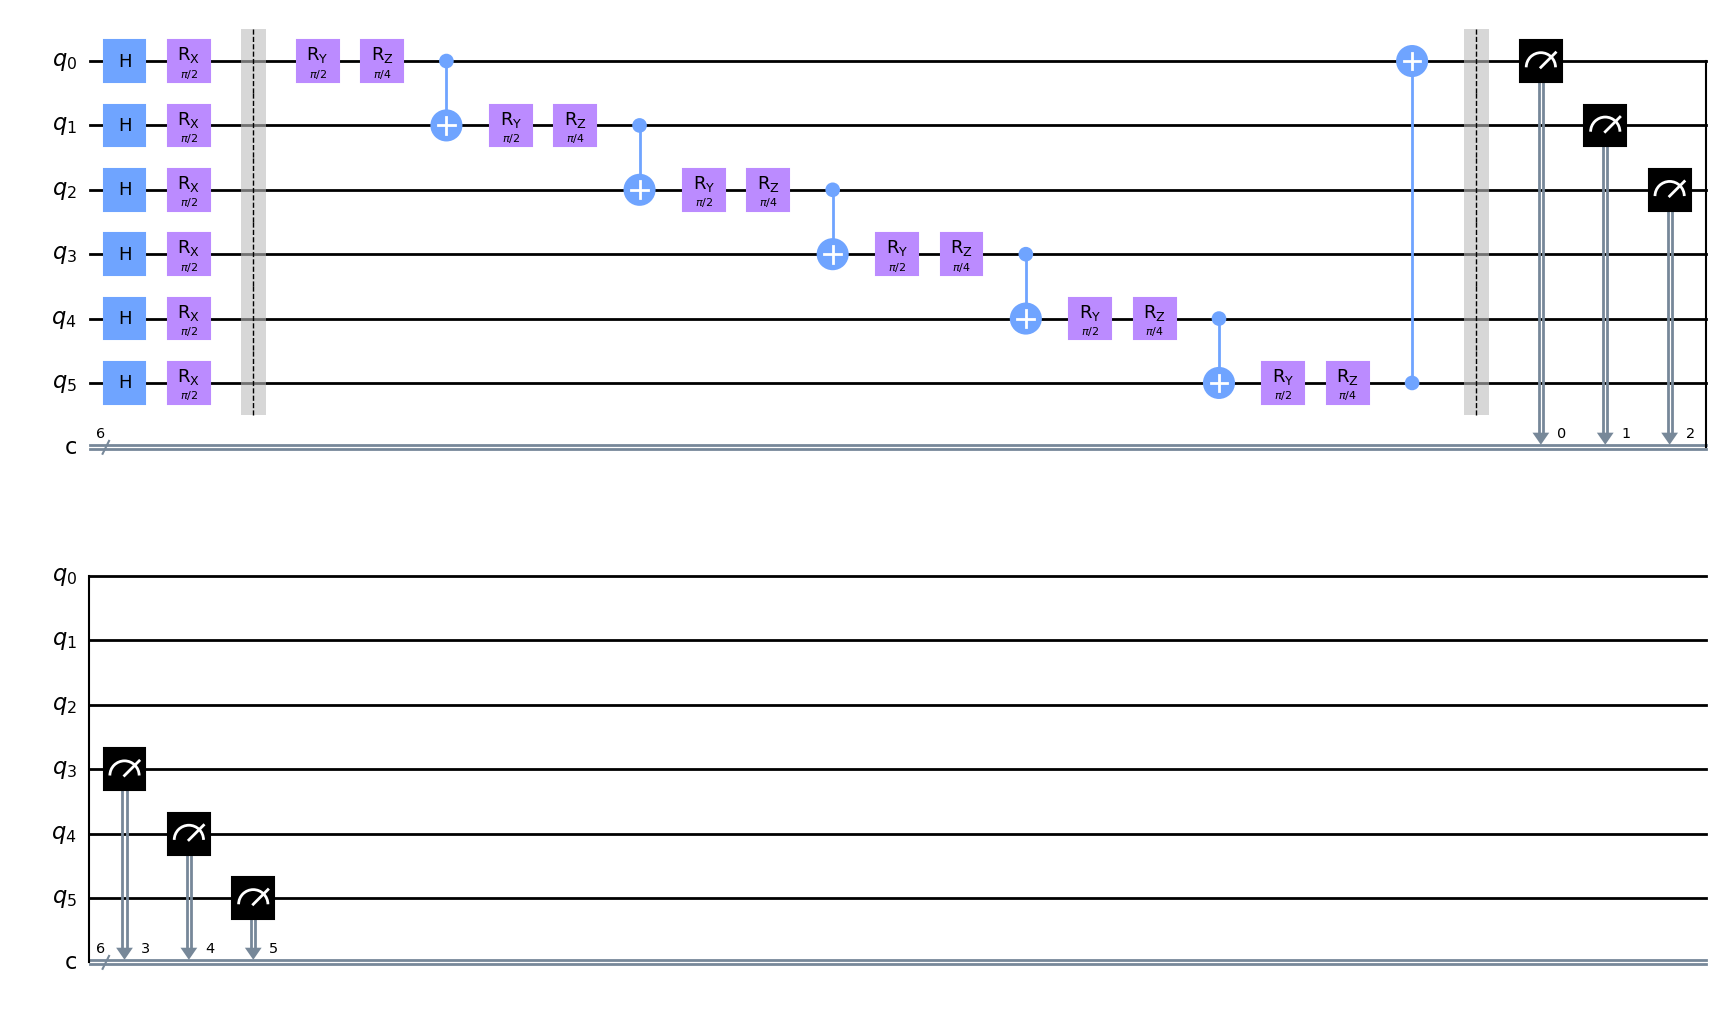

In [4]:
num_qubits = 6
qr         = QuantumRegister(num_qubits, 'q')     
cr         = ClassicalRegister(num_qubits, 'c')    
qc         = QuantumCircuit(qr, cr)               

for i in range(num_qubits):
    qc.h(i)
    qc.rx(pi/2, i)

qc.barrier()

for i in range(num_qubits):
    qc.ry(pi/2, i)
    qc.rz(pi/4, i)
    qc.cx(i, (i+1)%num_qubits)

qc.barrier()

qc.measure(qr, cr)

qc.draw(output='mpl')

<div style="text-align: center; font-size: 20px;">
    <h2><span style="color:blue;">Variational Quantum Circuit (VQC)</span></h2>
</div>

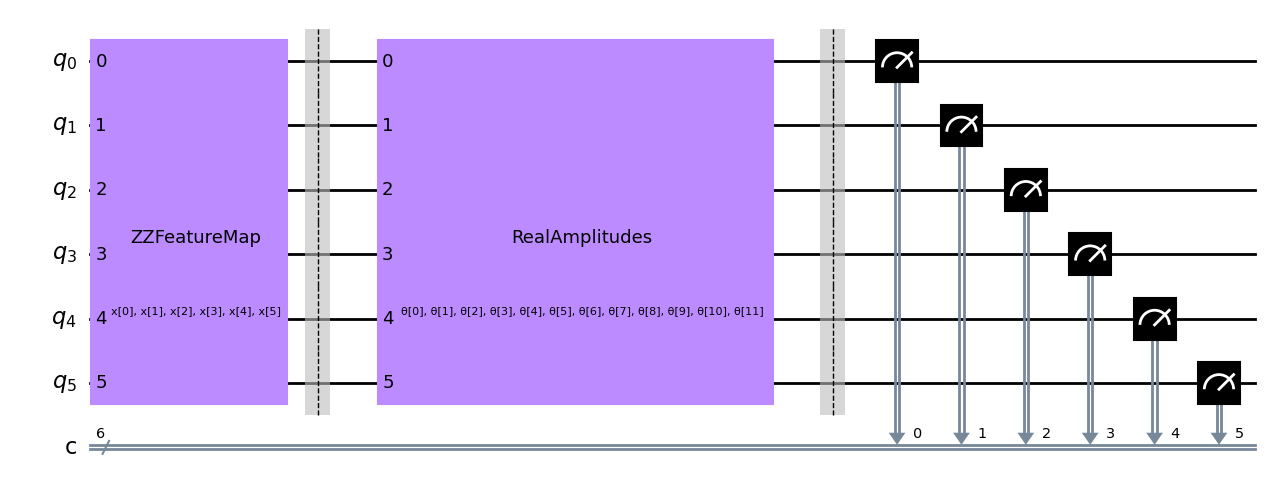

In [5]:
num_qubits = 6
qr      = QuantumRegister(num_qubits, 'q')
cr      = ClassicalRegister(num_qubits, 'c')
circuit = QuantumCircuit(qr, cr)

feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=1)
circuit.append(feature_map, qr)

circuit.barrier()

anzats = RealAmplitudes(num_qubits=num_qubits, entanglement='linear', reps=1)
circuit.append(anzats, qr)

circuit.barrier()

circuit.measure(qr, cr)

circuit.draw(output='mpl')

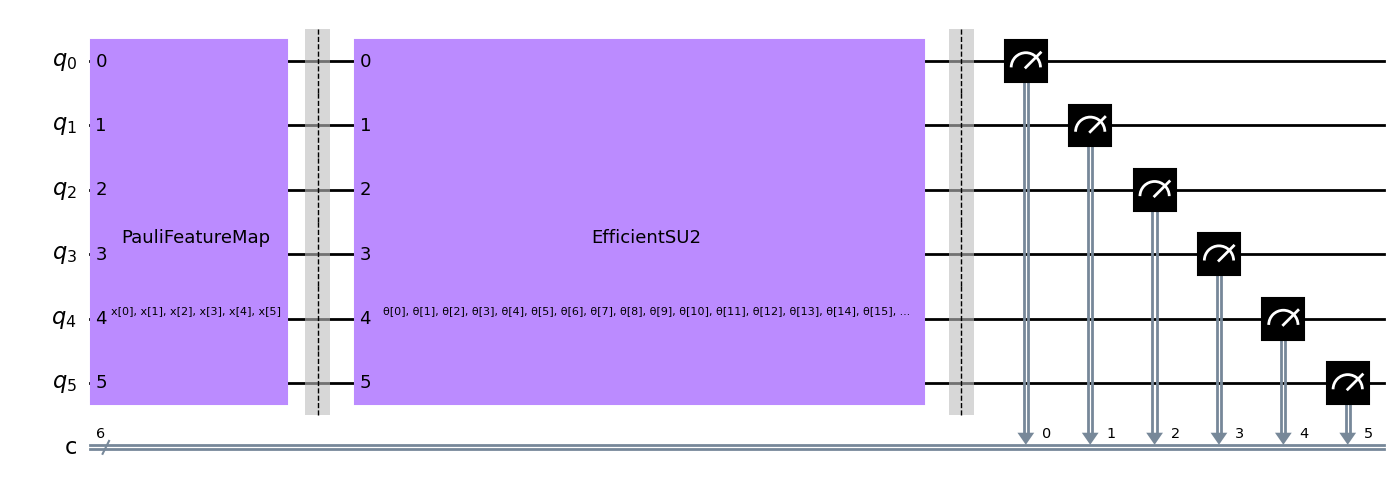

In [6]:
num_qubits = 6
qr      = QuantumRegister(num_qubits, 'q')
cr      = ClassicalRegister(num_qubits, 'c')
circuit = QuantumCircuit(qr, cr)

feature_map2 = PauliFeatureMap(feature_dimension=num_qubits, reps=1)
circuit.append(feature_map2, qr)

circuit.barrier()

anzats2 = EfficientSU2(num_qubits=num_qubits, entanglement='linear', reps=1)
circuit.append(anzats2, qr)

circuit.barrier()

circuit.measure(qr, cr)

circuit.draw(output='mpl')

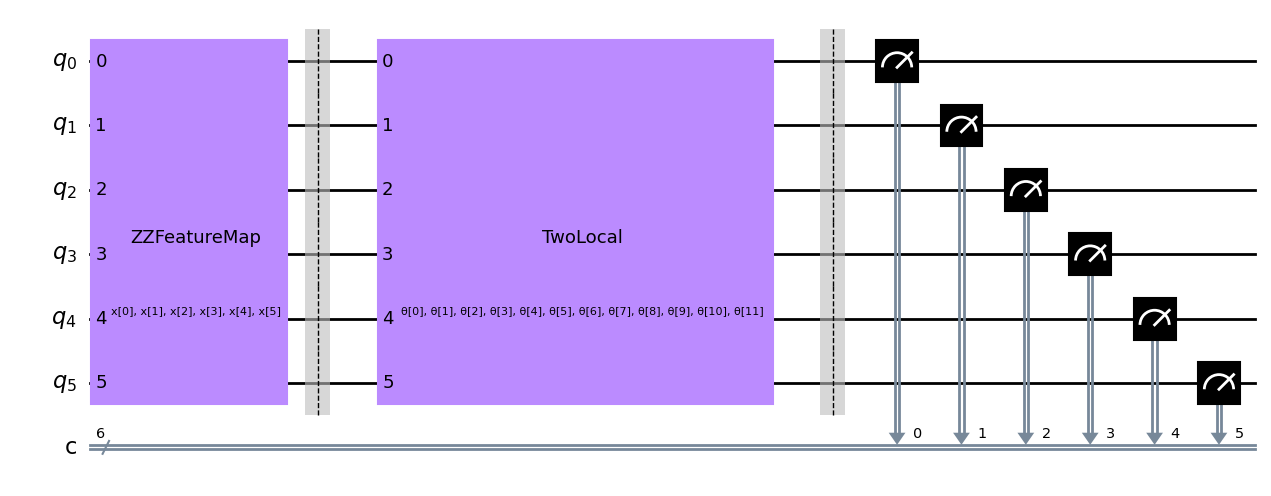

In [7]:
num_qubits = 6
qr = QuantumRegister(num_qubits, 'q')
cr = ClassicalRegister(num_qubits, 'c')
circuit = QuantumCircuit(qr, cr)

feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=1)
circuit.append(feature_map, qr)

circuit.barrier()

anzats3 = TwoLocal(num_qubits, 'ry', 'cz', reps=1)
circuit.append(anzats3, qr)

circuit.barrier()

circuit.measure(qr, cr)

circuit.draw(output='mpl')

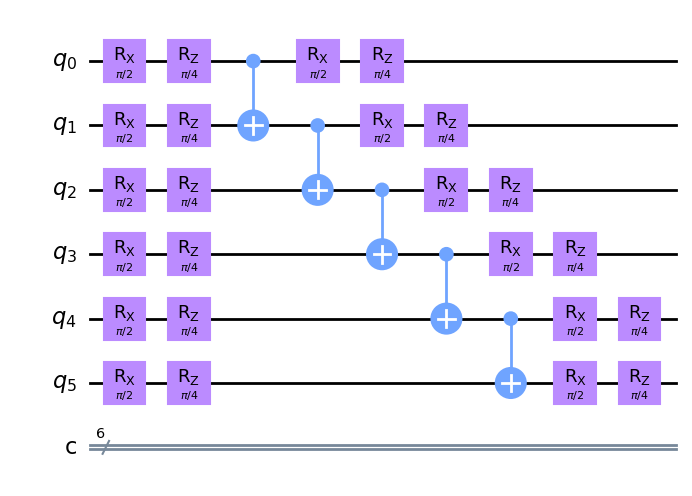

In [10]:
num_qubits = 6
qr = QuantumRegister(num_qubits, 'q')
cr = ClassicalRegister(num_qubits, 'c')
qc = QuantumCircuit(qr, cr)

for i in range(num_qubits):
    qc.rx(pi/2, i)
    qc.rz(pi/4, i)

for i in range(num_qubits - 1):
    qc.cx(i, i + 1)

for i in range(num_qubits):
    qc.rx(pi/2, i)
    qc.rz(pi/4, i)

qc.draw(output='mpl')